In [2]:
# Installing Beautifulsoup
# pip install beautifulsoup4 - In CMD line
# !pip install beautifulsoup4 - In Jupyter cell
# OR
# %pip install beautifulsoup4 - In Jupyter cell

In [3]:
# Installing Beautifulsoup
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Testbook\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
# Installing Requests
# pip install requests - In CMD line
# !pip install requests - In Jupyter cell
# OR
# %pip install requests - In Jupyter cell

In [5]:
# Installing Requests
%pip install requests

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Testbook\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Importing BeautifulSoup
from bs4 import BeautifulSoup
# Importing Requests
import requests

In [8]:
# URL for scrapping data
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [9]:
response = requests.get(url) # Getting response form the website 
print(response) # If Respnse is 200, it is a valid response

<Response [200]>


In [10]:
 # parsing the response by using html.parser
soup = BeautifulSoup(response.text, 'html.parser') 
soup # Showing the Soup object


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Countries where Coronavirus has spread - Worldometer</title>
<meta content="Where is Coronavirus in the world? List of countries with confirmed cases and deaths (total cumulative number) due to the novel coronavirus COVID-19" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<

In [11]:
# Getting data from the soup object
# As there are multiple 'td' tags we can use select method and than use square bracket to get the respective 'td' tag data, and than use .text method to extract the text data from the 'td' tag.
d1=soup.select('td')[0].text
d2=soup.select('td')[1].text
d3=soup.select('td')[2].text
d4=soup.select('td')[3].text
d5=soup.select('td')[4].text
d6=soup.select('td')[5].text
d7=soup.select('td')[6].text
d8=soup.select('td')[7].text
# Printing the first 8 data entries from the 'td' tag
d1,d2,d3,d4,d5,d6,d7,d8

('United States',
 '96,959,165',
 '1,074,787',
 'North America',
 'India',
 '44,484,729',
 '528,121',
 'Asia')

In [12]:
# As all the data is in 'td' tag ,using find_all method to get all the 'td' tags
data_iterator = soup.find_all('td')
data_iterator

[<td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">United States</td>,
 <td style="font-weight: bold; text-align:right">96,959,165</td>,
 <td style="font-weight: bold; text-align:right">1,074,787</td>,
 <td style="font-size:14px; color:#aaa; text-align:right">North America</td>,
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">India</td>,
 <td style="font-weight: bold; text-align:right">44,484,729</td>,
 <td style="font-weight: bold; text-align:right">528,121</td>,
 <td style="font-size:14px; color:#aaa; text-align:right">Asia</td>,
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">France</td>,
 <td style="font-weight: bold; text-align:right">34,663,106</td>,
 <td style="font-weight: bold; text-align:right">154,437</td>,
 <td style="font-size:14px; color:#aaa; text-align:right

In [13]:
len(data_iterator) # Finging the length of data

916

In [14]:
data=[] # Making an empty list 

In [15]:
# Using for loop to itter through the data and using steps as 4, and appending the data in data list 
# Replacing the ',' in confirmed and deaths by '' (i.e removing he ',' from the numbers and converig the data type to int)
for i in range (0,len(data_iterator),4):
        country = soup.select('td')[i].text
        confirmed = soup.select('td')[i+1].text
        deaths = soup.select('td')[i+2].text
        continent = soup.select('td')[i+3].text
        data.append((
            country,
            int(confirmed.replace(',', '')),
            int(deaths.replace(',', '')),
            continent
        ))

In [16]:
data # Showing the Data collected from the website

[('United States', 96959165, 1074787, 'North America'),
 ('India', 44484729, 528121, 'Asia'),
 ('France', 34663106, 154437, 'Europe'),
 ('Brazil', 34549915, 684784, 'South America'),
 ('Germany', 32422084, 148217, 'Europe'),
 ('South Korea', 23933949, 27381, 'Asia'),
 ('United Kingdom', 23554519, 189026, 'Europe'),
 ('Italy', 22004612, 176098, 'Europe'),
 ('Russia', 19908189, 385069, 'Europe'),
 ('Japan (+Diamond Princess)', 19883105, 42114, 'Asia'),
 ('Turkey', 16797750, 100840, 'Asia'),
 ('Spain', 13358722, 112923, 'Europe'),
 ('Vietnam', 11431823, 43126, 'Asia'),
 ('Australia', 10111190, 14359, 'Australia/Oceania'),
 ('Argentina', 9689861, 129769, 'South America'),
 ('Netherlands', 8392953, 22609, 'Europe'),
 ('Iran', 7537081, 144108, 'Asia'),
 ('Mexico', 7052928, 329705, 'North America'),
 ('Indonesia', 6385140, 157729, 'Asia'),
 ('Colombia', 6304317, 141708, 'South America'),
 ('Poland', 6202436, 117219, 'Europe'),
 ('Taiwan', 5614227, 10225, 'Asia'),
 ('Portugal', 5438351, 24905,

In [17]:
# create DataFrame using data by defining thecolumn headers
df = pd.DataFrame(data, columns =['Country', 'Confirmed_cases','Deaths','Continent'])

In [18]:
df.head() #Showing top 5 entries from the data

,Country,Confirmed_cases,Deaths,Continent
0,United States,96959165,1074787,North America
1,India,44484729,528121,Asia
2,France,34663106,154437,Europe
3,Brazil,34549915,684784,South America
4,Germany,32422084,148217,Europe


In [22]:
# saving the dataframe
df.to_csv('Covid19_data.csv', index=False)

In [19]:
# Mkaing a new dataFrame by grouping the original dataframe with respect to 'Country' & 'Year'
df_2 = df.groupby(['Continent']).sum().reset_index()
# Drop first row 
# by selecting all rows from first row onwards
df_2 = df_2.iloc[1: , :]
# Show the dataframe
df_2

,Continent,Confirmed_cases,Deaths
1,Africa,12620505,257460
2,Asia,185980752,1472028
3,Australia/Oceania,12240312,19961
4,Europe,223000052,1908113
5,North America,115044714,1528281
6,South America,63805972,1326870


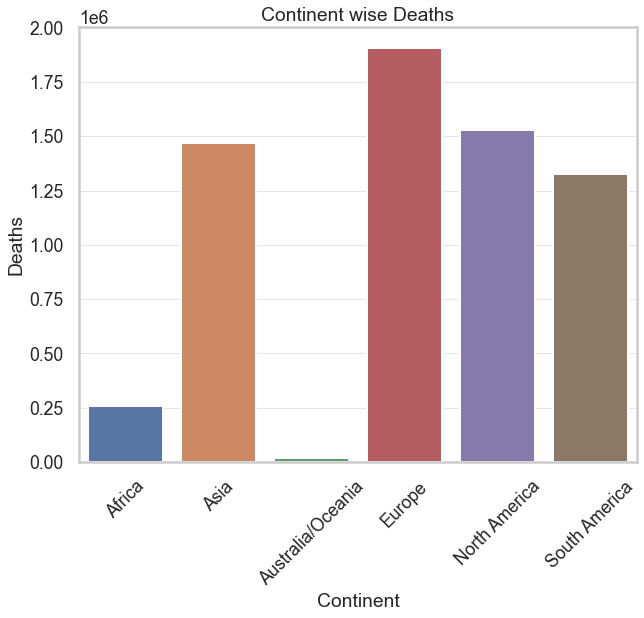

In [25]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize':(10,8)})
# Setting background for the plot (setting grid style)
sns.set_style('whitegrid')
# setting figure style, font scale and grid line width for the plot
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.5})
# Plotting a Bar plot
sns.barplot(data=df_2, x='Continent',y='Deaths')
# Setting title for the plot
plt.title('Continent wise Deaths')
plt.xlabel('Continent') # setting x-label
plt.ylabel('Deaths')  # setting y-label
# Rotating x-label by 45 degrees
plt.xticks(rotation=45)
# Showing the plot
plt.show()

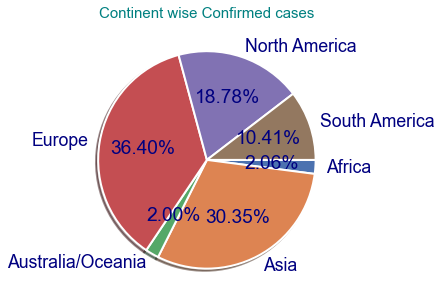

In [27]:
plt.figure(figsize=(5,5))  # setting plt figure
# Customizing plot by setting colors, autopact, explode, shadow, counterclock, textprops  properties
plt.pie(x = df_2['Confirmed_cases'],labels=df_2['Continent'],autopct='%.2f%%',
       shadow=True,counterclock=False,textprops=dict(color="navy"))
# Setting title for the plot
plt.title('Continent wise Confirmed cases',fontsize=15,color='teal')
plt.show() # Showing the plot